# P1M1

### NAME : IQBAL JANITRA

### BATCH : 003

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay


# PROBLEM STATEMENT

Create a Model Classification to predict `default_payment_next_month` using the dataset that you have saved.

# DATA LOADING

As always for first step that we need to do is data loading, but this one we need to `Query` the data first form `Google Cloud Platform` and go to `ml_datasets` folder, there is `credit_card_default` data base. and we only want to choose `limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month` coloumns, and for some coloumns we need to convert data type  as INT, and here is the `Query` we do.

In [2]:
#SELECT CAST(sex AS INT64) AS sex, 
      # CAST(marital_status AS INT64) AS marital_status,
      # CAST(education_level AS INT64) AS education_level,
      # limit_balance, sex,age, pay_0, pay_2, pay_3, pay_4, 
      # CAST(pay_5 AS FLOAT64) AS pay_5,
      # CAST(pay_6 AS FLOAT64) AS pay_6, 
      # bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
      # CAST(default_payment_next_month AS INT64) AS default_payment_next_month
#FROM `bigquery-public-data.ml_datasets.credit_card_default` 
#LIMIT 5994

After we have done do a `Query` from database, we save it as CSV file and load it.

In [3]:
df=pd.read_csv("/Users/iqbaljanitra/Documents/PHASE 2/MILESTONE/MILESTONE 1/h8dsft_P1M1_Iqbal_janitra_data.csv")

show the size of the table

In [4]:
df.shape

(2965, 24)

show first 10 rows

In [5]:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
5,500000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,152365.0,139757.0,153348.0,20000.0,20241.0,20154.0,20019.0,20151.0,20037.0,0
6,50000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0.0,...,44356.0,19344.0,19354.0,1691.0,1942.0,1296.0,674.0,693.0,1000.0,0
7,100000.0,1,5,1,45.0,0.0,0.0,0.0,0.0,0.0,...,90500.0,82586.0,22620.0,5000.0,5000.0,3203.0,2103.0,50000.0,0.0,0
8,140000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0.0,...,132038.0,131961.0,124256.0,6696.0,5000.0,4866.0,5300.0,5055.0,5000.0,0
9,50000.0,1,2,1,43.0,0.0,0.0,0.0,0.0,0.0,...,48934.0,29116.0,28999.0,1800.0,2200.0,1400.0,582.0,580.0,30000.0,0


show the last 10 rows

In [6]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000.0,2,2,1,28.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,1000.0,16666.0,0.0,0.0,0.0,0.0,0
2956,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2957,50000.0,2,1,2,31.0,-1.0,0.0,-1.0,-1.0,-1.0,...,3995.0,0.0,0.0,30018.0,12787.0,3995.0,0.0,0.0,0.0,0
2958,50000.0,2,1,2,25.0,-1.0,-1.0,2.0,-1.0,-1.0,...,10610.0,0.0,0.0,5000.0,200.0,10610.0,0.0,0.0,0.0,0
2959,100000.0,2,1,2,37.0,-1.0,-1.0,0.0,-1.0,-1.0,...,780.0,0.0,0.0,21711.0,1000.0,780.0,0.0,0.0,0.0,0
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,...,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


checking data type on every coloumns

In [7]:
df.dtypes

limit_balance                 float64
sex                             int64
education_level                 int64
marital_status                  int64
age                           float64
pay_0                         float64
pay_2                         float64
pay_3                         float64
pay_4                         float64
pay_5                         float64
pay_6                         float64
bill_amt_1                    float64
bill_amt_2                    float64
bill_amt_3                    float64
bill_amt_4                    float64
bill_amt_5                    float64
bill_amt_6                    float64
pay_amt_1                     float64
pay_amt_2                     float64
pay_amt_3                     float64
pay_amt_4                     float64
pay_amt_5                     float64
pay_amt_6                     float64
default_payment_next_month      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Checking unique value on every coloumns

In [9]:
df.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

In [10]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [11]:
df.skew()

limit_balance                  1.000442
sex                           -0.441625
education_level                0.899875
marital_status                -0.020106
age                            0.772887
pay_0                          0.926790
pay_2                          0.861762
pay_3                          0.931460
pay_4                          1.101504
pay_5                          1.060173
pay_6                          0.978760
bill_amt_1                     2.484598
bill_amt_2                     2.458349
bill_amt_3                     2.569937
bill_amt_4                     2.448175
bill_amt_5                     2.400343
bill_amt_6                     2.432406
pay_amt_1                     11.877647
pay_amt_2                     29.404261
pay_amt_3                      8.044639
pay_amt_4                      8.451541
pay_amt_5                     11.468890
pay_amt_6                      9.760184
default_payment_next_month     1.394199
dtype: float64

# DATA CLEANING

### Handing Duplicated Data

On case we need to find any duplicates data, and handling it. we can see we got only 2 duplicated data

In [12]:
df.duplicated().value_counts()

False    2964
True        1
dtype: int64

Next step for duplicated data, we are goin to drop it.

In [13]:
df.drop(df[df.duplicated()].index, inplace=True)
# Reset the index
df.reset_index(drop=True)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,...,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2960,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2961,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2962,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0


Now our data is free from duplicated data

In [14]:
df.duplicated().value_counts()

False    2964
dtype: int64

### Handling Missing Value

Next we lets check on missing value, and we got no missing value, so we can do to the next step.

In [15]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

And now our data has been cleaned, and based on problem statement we dont have any issue to do like change data type or any, because we have did it on The Query `Google Cloud Platform`.

# Exploratory Data Analysis (EDA)

In this section we gonna find the correlation on `default_payment_next_month` which means, we goin to make every payment prediction for next month. but first we need to find the correlation based on every data we get, and find a correct features to predict the correlation.

### Show The Correlation

first we make a heatmap plot to find a correlation on `default_payment_next_month`, as we can see the `pay 0-6` are the only have correlation between it. but first to make sure. for next step we going to make data visualization with the higher correlation before `pay 0-6`, and from any coloumn we dont see any correlation between these coloumns, so we dont want to use it. but first we need to make visualization first.

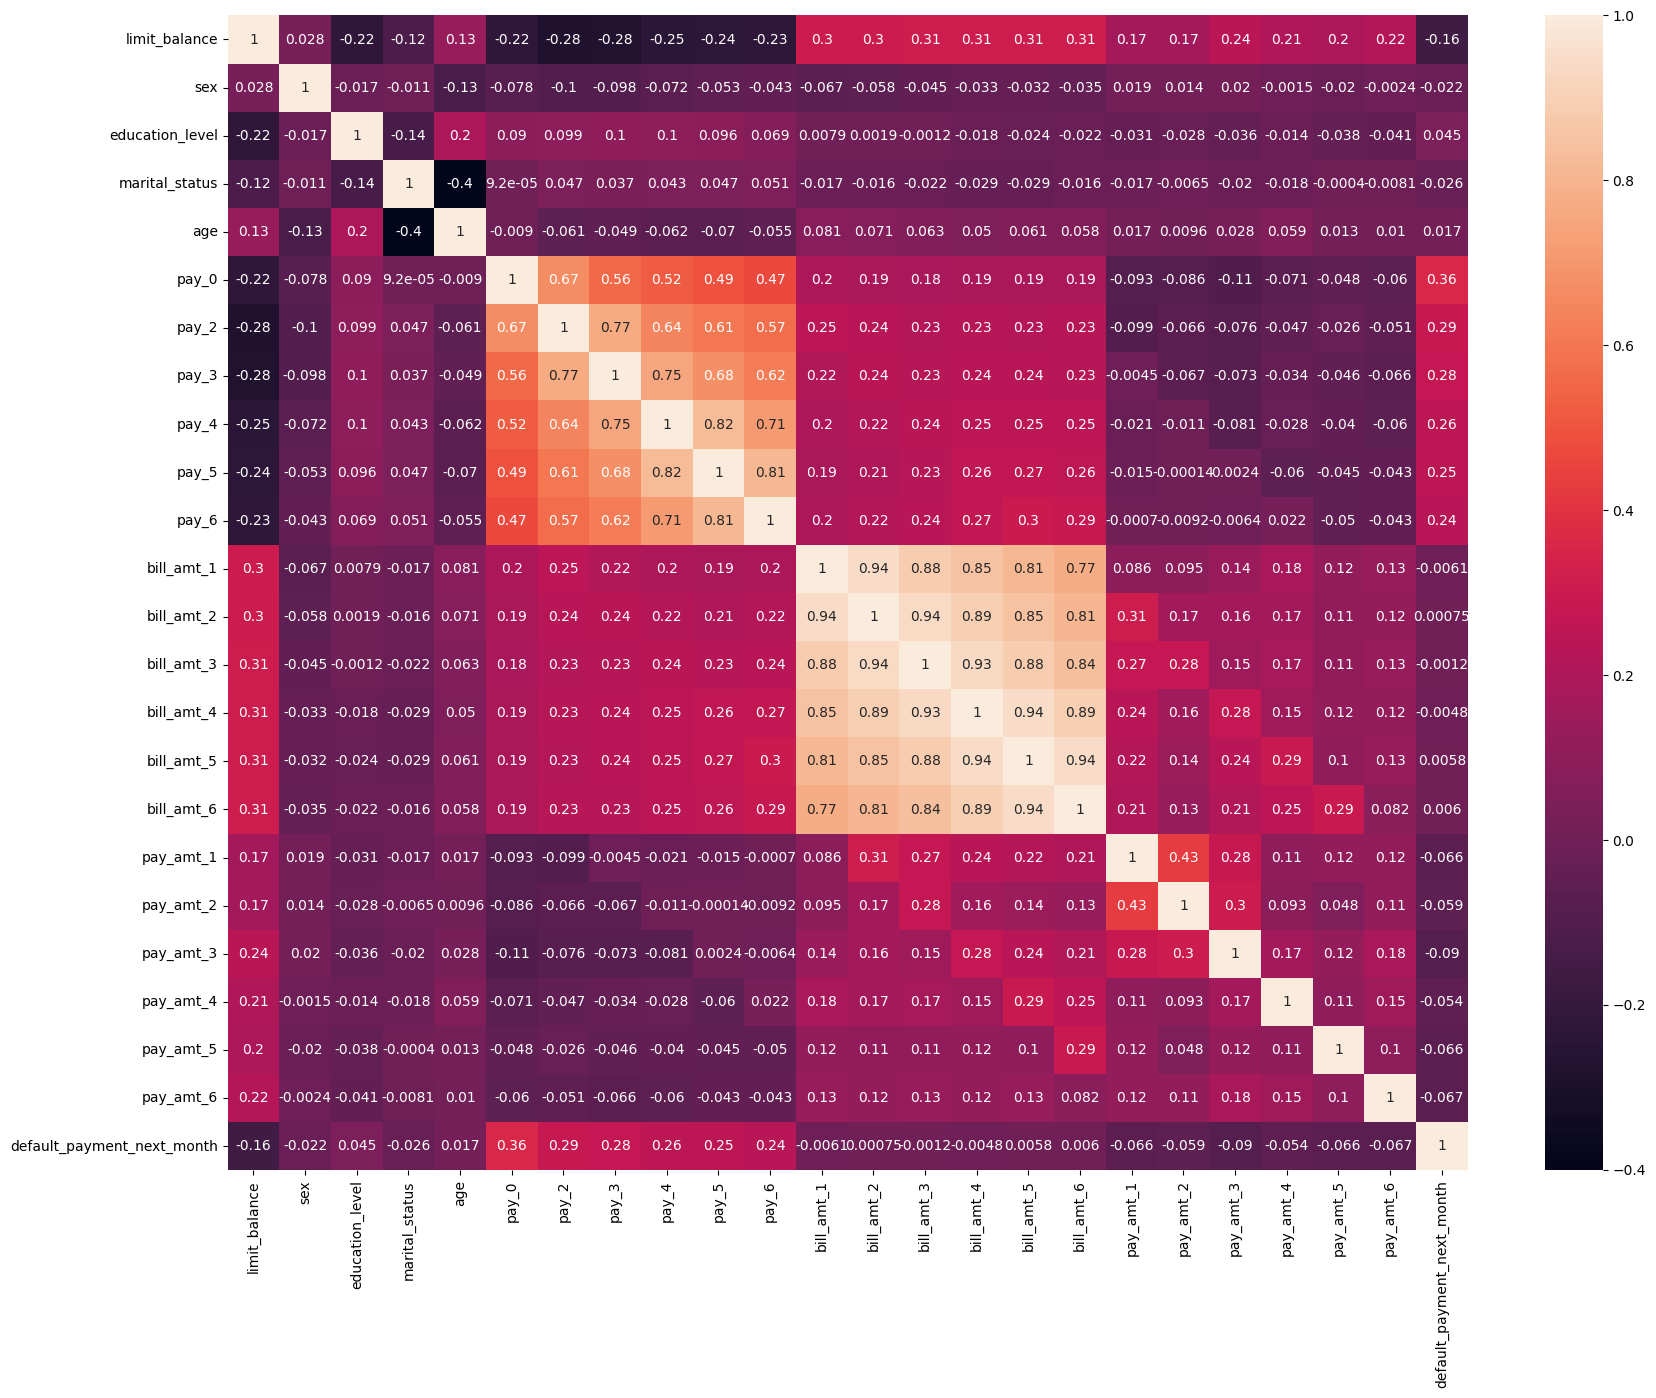

In [16]:
fig,ax = plt.subplots(figsize=[20,15])

corr = df.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

As we can see form the heatmap correlation, we want to choose features which is have correlation on it. but still we need a correlation between it.

## DATA VISUALIZATION

### Default Payment Next Month

On the `Default Payment Next Month` there are 2 type of payment `1 is mean the payment is accepted` and `2 is the payment is declined`

1=yes

0=no

so we can see, based on the data there are 2329 data has beep accepted and 635 has been declined, `now let see why is there are getting accepted and declined, lets do EDA and make it a machine learning on it`

In [17]:
df['default_payment_next_month'].value_counts()


0    2329
1     635
Name: default_payment_next_month, dtype: int64

Visualiztion default_payment_next_month

<AxesSubplot: xlabel='default_payment_next_month', ylabel='Count'>

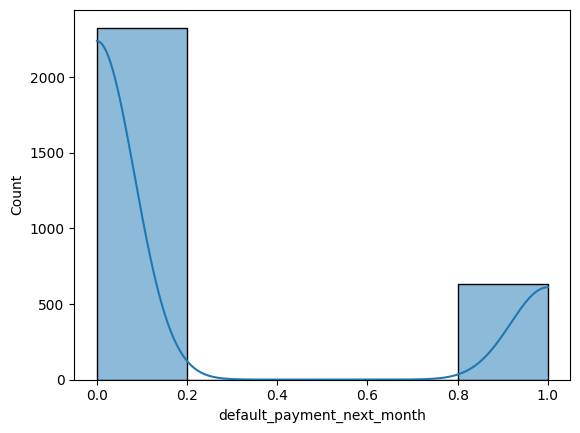

In [18]:
sns.histplot(df['default_payment_next_month'], bins=5, kde=True)

### LIMIT BALANCE

In [19]:
df['limit_balance'].value_counts()

50000.0     348
20000.0     203
200000.0    149
30000.0     148
80000.0     145
100000.0    123
150000.0    122
180000.0     97
210000.0     84
140000.0     83
120000.0     80
360000.0     78
70000.0      76
90000.0      71
260000.0     70
130000.0     69
230000.0     68
60000.0      68
300000.0     67
160000.0     62
240000.0     56
500000.0     56
110000.0     54
170000.0     52
280000.0     50
10000.0      46
220000.0     43
290000.0     37
320000.0     32
250000.0     28
310000.0     28
40000.0      26
400000.0     25
350000.0     24
420000.0     20
270000.0     19
390000.0     16
330000.0     16
380000.0     16
340000.0     15
410000.0     12
190000.0     12
450000.0      9
370000.0      8
490000.0      8
460000.0      8
470000.0      7
440000.0      6
480000.0      5
430000.0      5
510000.0      4
530000.0      3
700000.0      1
560000.0      1
680000.0      1
750000.0      1
780000.0      1
800000.0      1
620000.0      1
Name: limit_balance, dtype: int64

highest valeu on limit balance

In [20]:
df['limit_balance'].max()

800000.0

lowest value on limit balance

In [21]:
df['limit_balance'].min()

10000.0

#### Now we make classification based on limit balance, and the class is 

#### Low Class : < 100000

#### Middle Class : 100000 - 500000

#### High Class : > 500000




.


Limit balance above 100000

In [22]:
low_class=df[(df['limit_balance']<=100000)]
low_class

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
6,50000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0.0,...,44356.0,19344.0,19354.0,1691.0,1942.0,1296.0,674.0,693.0,1000.0,0
7,100000.0,1,5,1,45.0,0.0,0.0,0.0,0.0,0.0,...,90500.0,82586.0,22620.0,5000.0,5000.0,3203.0,2103.0,50000.0,0.0,0
9,50000.0,1,2,1,43.0,0.0,0.0,0.0,0.0,0.0,...,48934.0,29116.0,28999.0,1800.0,2200.0,1400.0,582.0,580.0,30000.0,0
12,20000.0,1,2,1,31.0,0.0,0.0,0.0,0.0,0.0,...,6654.0,6786.0,7077.0,1239.0,1254.0,1111.0,243.0,400.0,252.0,1
13,80000.0,1,2,1,49.0,0.0,0.0,0.0,0.0,0.0,...,47283.0,42340.0,40223.0,2911.0,1920.0,1541.0,1502.0,1619.0,1472.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,50000.0,2,1,2,25.0,-1.0,-1.0,2.0,-1.0,-1.0,...,10610.0,0.0,0.0,5000.0,200.0,10610.0,0.0,0.0,0.0,0
2959,100000.0,2,1,2,37.0,-1.0,-1.0,0.0,-1.0,-1.0,...,780.0,0.0,0.0,21711.0,1000.0,780.0,0.0,0.0,0.0,0
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,...,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0


Limit balance between 100000 - 400000

In [23]:
middle_class=df[(df['limit_balance']>=100000) & (df['limit_balance']<=400000)]
middle_class

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
7,100000.0,1,5,1,45.0,0.0,0.0,0.0,0.0,0.0,...,90500.0,82586.0,22620.0,5000.0,5000.0,3203.0,2103.0,50000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2959,100000.0,2,1,2,37.0,-1.0,-1.0,0.0,-1.0,-1.0,...,780.0,0.0,0.0,21711.0,1000.0,780.0,0.0,0.0,0.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0


Limit balance more than 400000

In [24]:
high_class=df[(df['limit_balance']>400000)]
high_class

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
5,500000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,152365.0,139757.0,153348.0,20000.0,20241.0,20154.0,20019.0,20151.0,20037.0,0
11,460000.0,1,1,1,49.0,0.0,0.0,0.0,0.0,0.0,...,291616.0,289529.0,289449.0,13200.0,14000.0,11500.0,10500.0,10500.0,10000.0,0
14,780000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0
17,420000.0,1,2,1,38.0,0.0,0.0,0.0,0.0,0.0,...,311889.0,182087.0,185152.0,10433.0,12000.0,13302.0,7002.0,6500.0,7000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,620000.0,2,1,2,38.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,16022.0,2581.0,2867.0,8638.0,620.0,16032.0,2856.0,4197.0,920.0,0
2887,420000.0,2,1,1,34.0,-1.0,0.0,0.0,-1.0,0.0,...,3160.0,4160.0,883.0,1039.0,1500.0,3160.0,1000.0,883.0,28000.0,0
2896,420000.0,1,1,1,34.0,-1.0,0.0,0.0,0.0,-2.0,...,-16.0,-16.0,-16.0,3048.0,3016.0,0.0,0.0,0.0,3262.0,0
2903,410000.0,2,1,1,31.0,-1.0,-1.0,2.0,2.0,-2.0,...,-736.0,-1591.0,-2303.0,2051.0,5.0,266.0,266.0,253.0,6384.0,0


Now we can see based on our classification the highest class is on middle class, and the lowest is on high class. 

In [25]:
print('Total Data On Low Class :',low_class.shape)
print('Total Data On Middle Class :',middle_class.shape)
print('Total Data On High Class :',high_class.shape)

Total Data On Low Class : (1254, 24)
Total Data On Middle Class : (1683, 24)
Total Data On High Class : (150, 24)


And we want to manipulate the data based on Class limit balance, and make it as a new coloumns to make categorical coloumn, so we can see it, and the class is

### 1.0 = Low Class

### 2.0 = Middle Class

### 3.0 = High Class

In [26]:
df['limit_balance'] = pd.to_numeric(df['limit_balance'])
df["class"] = ""
df.loc[df["limit_balance"] < 100000, "class"] = "1.0"
df.loc[(df["limit_balance"] >= 100000) & (df["limit_balance"] < 400000), "class"] = "2.0"
df.loc[df["limit_balance"] >= 400000, "class"] = "3.0"

In [27]:
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,class
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0,2.0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1,2.0
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0,2.0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0,3.0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,...,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1,1.0
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0,1.0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0,2.0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0,2.0


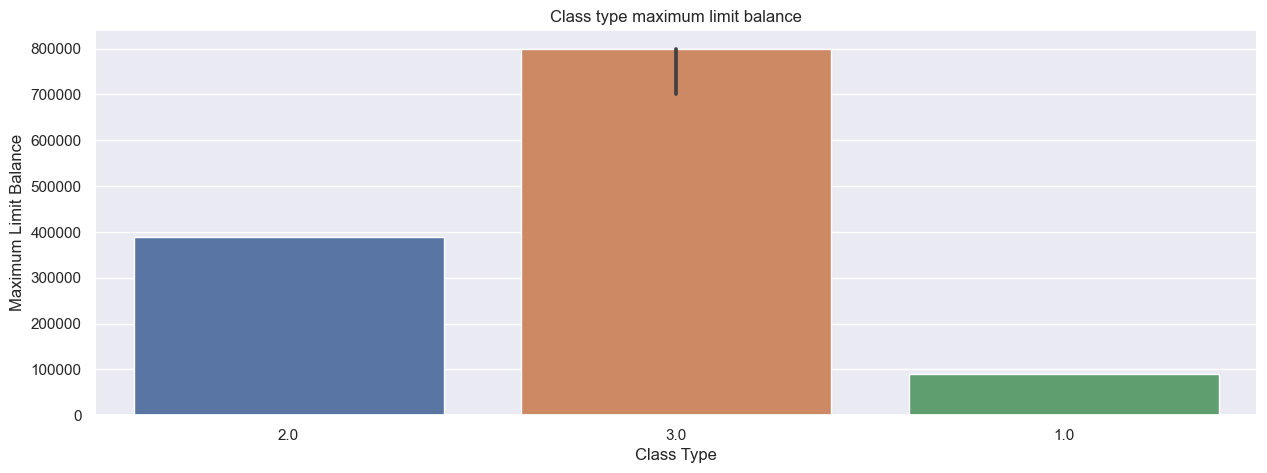

In [28]:
plt.figure(figsize=(15, 5))
sns.set_theme(style="darkgrid")
sns.barplot(x='class', y='limit_balance', data=df, estimator=max)
plt.title('Class type maximum limit balance')
plt.xlabel('Class Type')
plt.ylabel('Maximum Limit Balance')
plt.show()

Text(0.5, 1.0, 'Class type avarage payment')

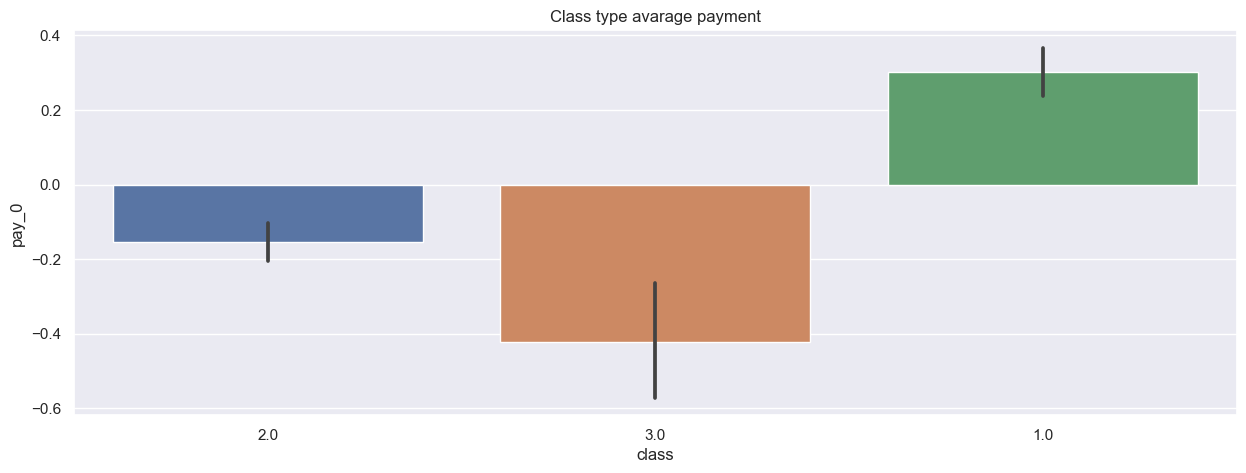

In [29]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['class'],y=df['pay_0'])
plt.title('Class type avarage payment')

I think we got some mistake on the data, and the mistake is there are many data with type pay `7` which means have been late 7 month for due date, have high on the limit balance. and we just ignore it.

we can see the limit balance above `0` have high values on limit balance, bacause every you pay it on the right time before due date, from this data visualization we argue the limit balance will be incrase as we pay not at after due date.

#### And from here we use `limit_balance` as a comparison between every coloumns because the limit balance shows the accuracy of payment, the faster the transaction, the higher the limit balance will get.

Text(0.5, 1.0, 'Limit Balance based on every type of Pay')

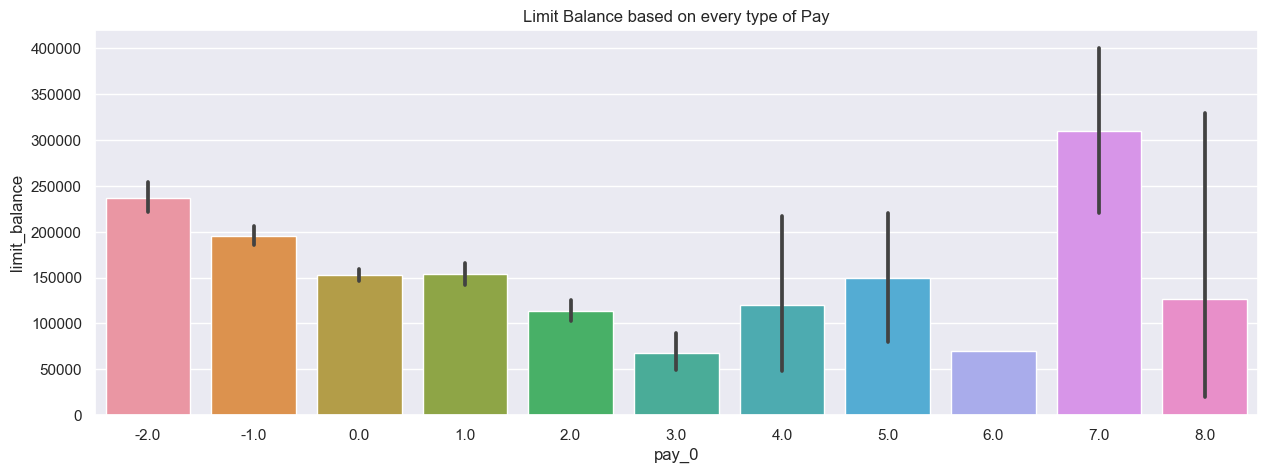

In [30]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['pay_0'],y=df['limit_balance'])
plt.title('Limit Balance based on every type of Pay')

### Pay 0-6

And now we are going to find Repayment status in the coloumns Pay 0-6, this is the descripsion based on payment coloumns

-2=already defore 2 month

-1=already defore 1 month

1=payment delay for one month

2=payment delay for two months

3=payment delay for three month

4=payment delay for four month

5=payment delay for five month

6=payment delay for six month

7=payment delay for seven month

8=payment delay for eight months 

9=payment delay for nine months and above


### We use `pay_0` coloumns to make sample for EDA

so we going to find how many data have already paid, we can see there are 2303 data have already paid on `pay_0`.

In [31]:
pay0=df[(df['pay_0']<1)]
pay0

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,class
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0,2.0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1,2.0
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0,2.0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0,3.0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,...,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1,1.0
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0,1.0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0,2.0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0,2.0


And we can see for have not pay for `pay_0` there are 306 data.

In [32]:
pay0_1=df[(df['pay_0']>1)]
pay0_1

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,class
1516,220000.0,1,1,1,48.0,2.0,0.0,0.0,0.0,0.0,...,172169.0,162402.0,10000.0,9020.0,6000.0,5500.0,6000.0,5500.0,1,2.0
1517,50000.0,1,3,1,55.0,2.0,0.0,0.0,0.0,0.0,...,40555.0,31309.0,2200.0,1632.0,1113.0,1336.0,3142.0,2126.0,1,1.0
1518,100000.0,1,2,1,53.0,2.0,0.0,0.0,0.0,0.0,...,48459.0,49560.0,2500.0,2400.0,1845.0,2400.0,2500.0,0.0,1,2.0
1519,150000.0,1,1,1,35.0,2.0,0.0,0.0,0.0,0.0,...,103050.0,54447.0,7300.0,6100.0,5100.0,4200.0,1900.0,1600.0,1,2.0
1520,100000.0,1,2,1,33.0,2.0,0.0,0.0,0.0,0.0,...,71468.0,72930.0,3100.0,3100.0,2700.0,2600.0,2650.0,2800.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,400000.0,1,2,1,40.0,7.0,6.0,5.0,4.0,3.0,...,381863.0,359314.0,0.0,0.0,0.0,106.0,2281.0,42617.0,1,3.0
2065,220000.0,2,1,1,41.0,7.0,6.0,5.0,4.0,3.0,...,225044.0,222356.0,0.0,0.0,0.0,0.0,0.0,6000.0,1,2.0
2066,20000.0,1,3,1,36.0,8.0,7.0,6.0,5.0,4.0,...,21662.0,21031.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0
2067,30000.0,1,2,2,29.0,8.0,7.0,6.0,5.0,4.0,...,31332.0,30558.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


From the data visualization above we can see `0` or have paid already have the highest value, than have not paid yet.

<AxesSubplot: xlabel='pay_0', ylabel='count'>

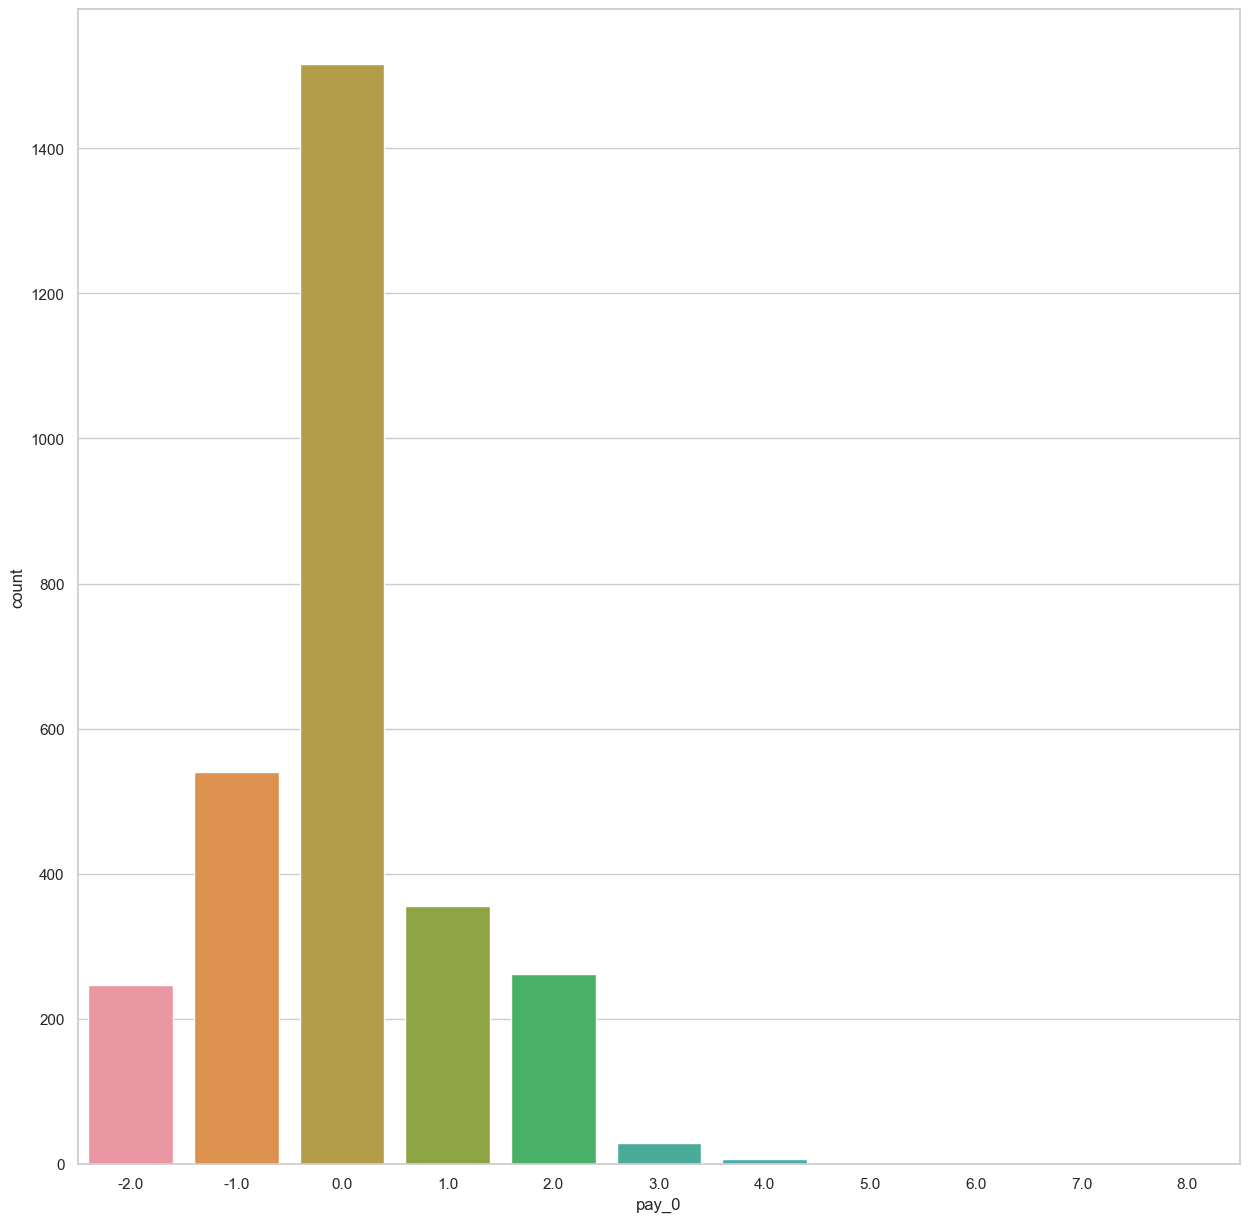

In [33]:
plt.figure(figsize=(15, 15))
sns.set_theme(style='whitegrid',palette='deep',font='sans-serif', font_scale=1, rc=None)
sns.countplot(x=df["pay_0"])

We can see on the `pay_0` there are 2303 data already pay before due date, and there are 306 data still not have a payment yet before due date.

### Education Level

Education have not realy effected on limit balance, every level have different score and value, so we dont want used it a feature.

Text(0.5, 1.0, 'Limit Balance based on every type of Pay')

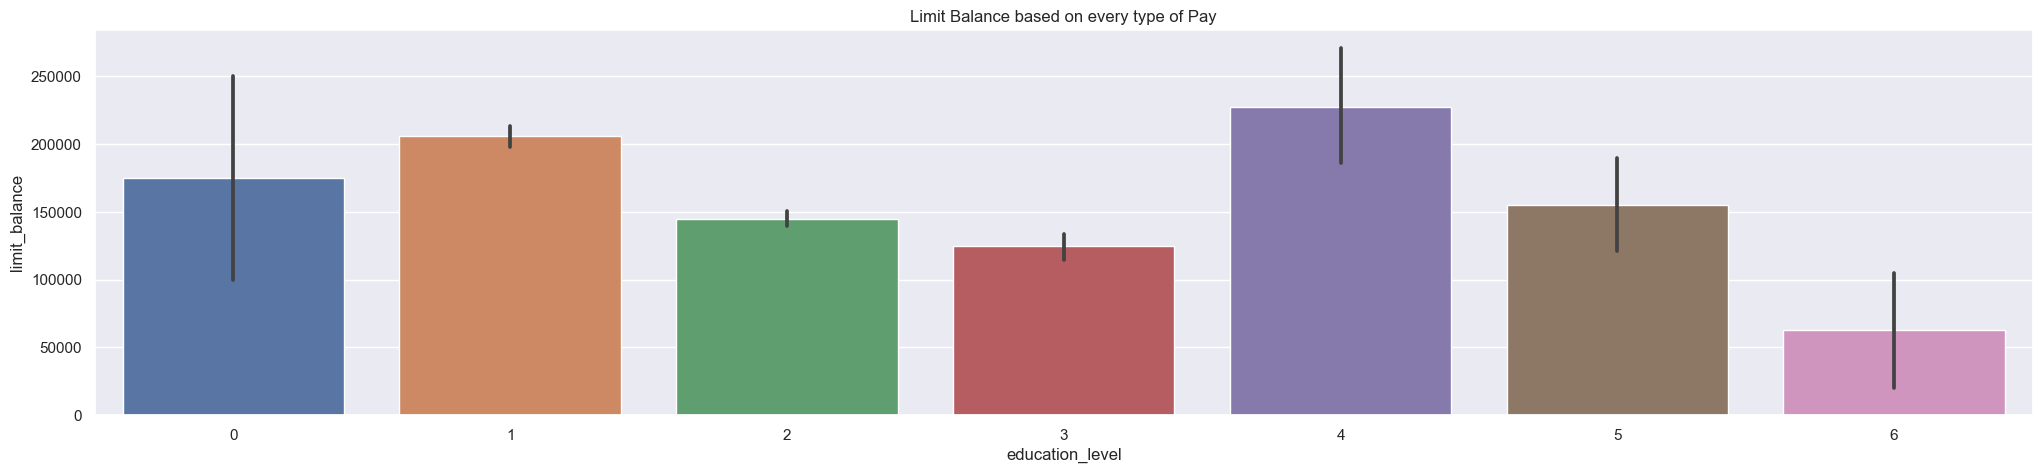

In [34]:
plt.figure(figsize=(25, 5))
sns.set_theme()
sns.barplot(x=df['education_level'],y=df['limit_balance'])
plt.title('Limit Balance based on every type of Pay')

### Age

Lets see the transaction on every age, and it show the avarage age is on between age 35, and the first age can do transction is on age 20.

Text(0.5, 1.0, 'Limit Balance based on every type of Pay')

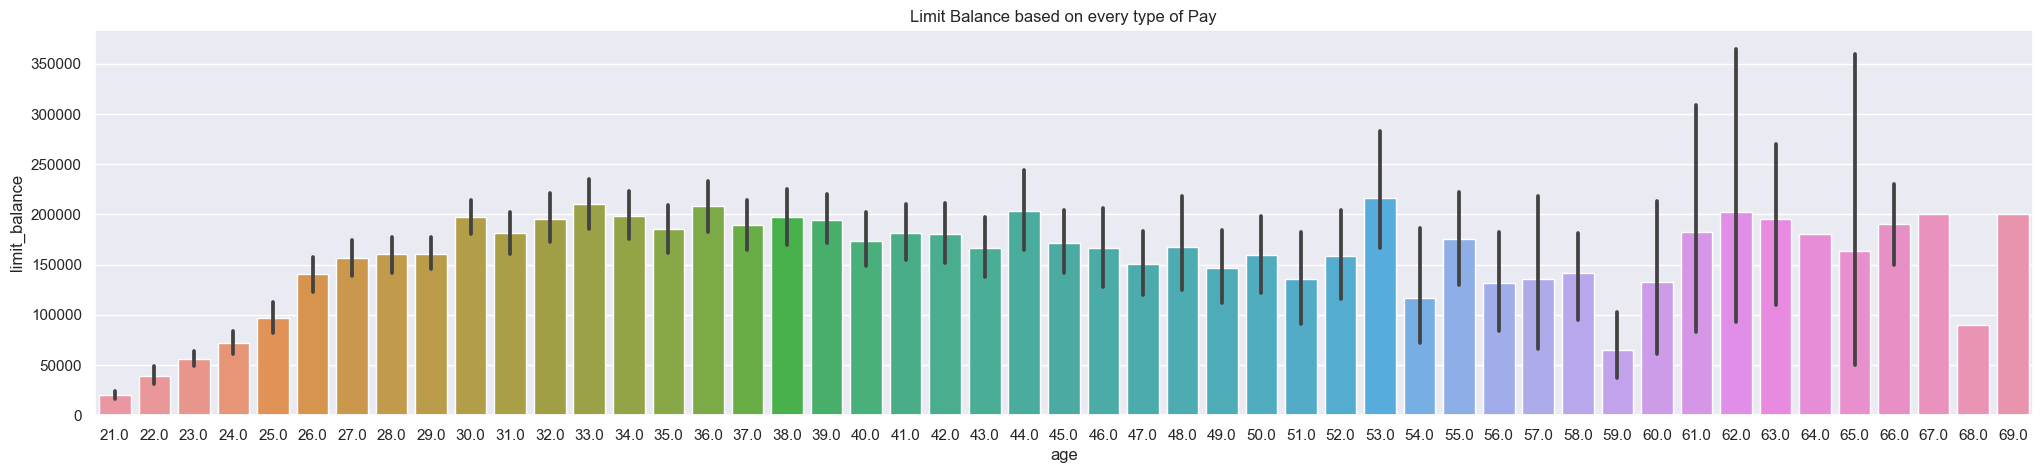

In [35]:
plt.figure(figsize=(25, 5))
sns.set_theme()
sns.barplot(x=df['age'],y=df['limit_balance'])
plt.title('Limit Balance based on every type of Pay')

### Sex

Lets see the transaction male and female, and it show relatively the same, and not so affected by limit balance

Male : 1

Female : 2

Text(0.5, 1.0, 'Limit Balance based on every type of Pay')

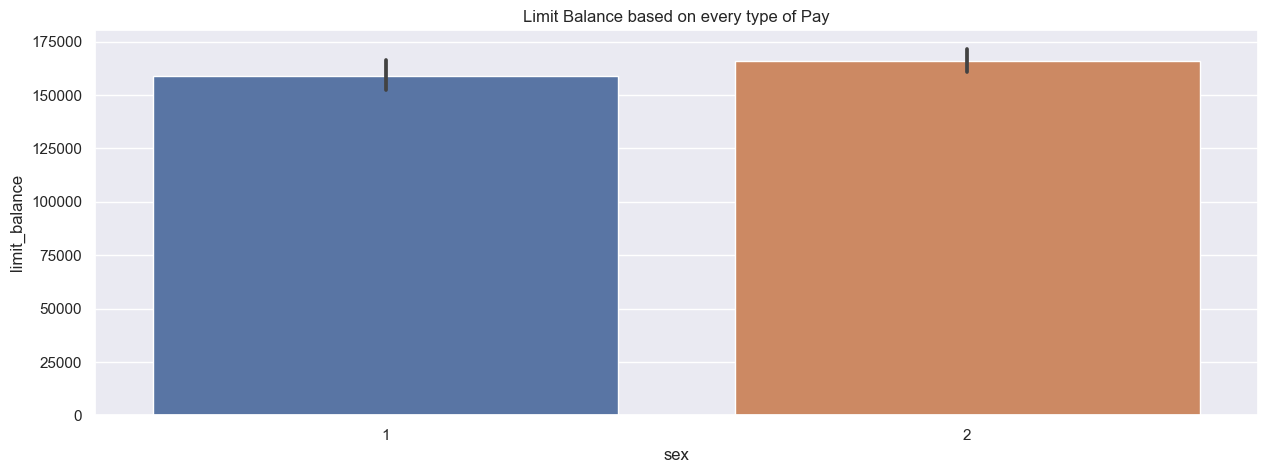

In [36]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['sex'],y=df['limit_balance'])
plt.title('Limit Balance based on every type of Pay')

#### Correlation on Martial Status

For every type on every marital status of each data is almost the same, and we just dont want use marital status as features.

### Marital status 
1=married

2=single

3=others

Text(0.5, 1.0, 'Limit Balance based on Marital_status')

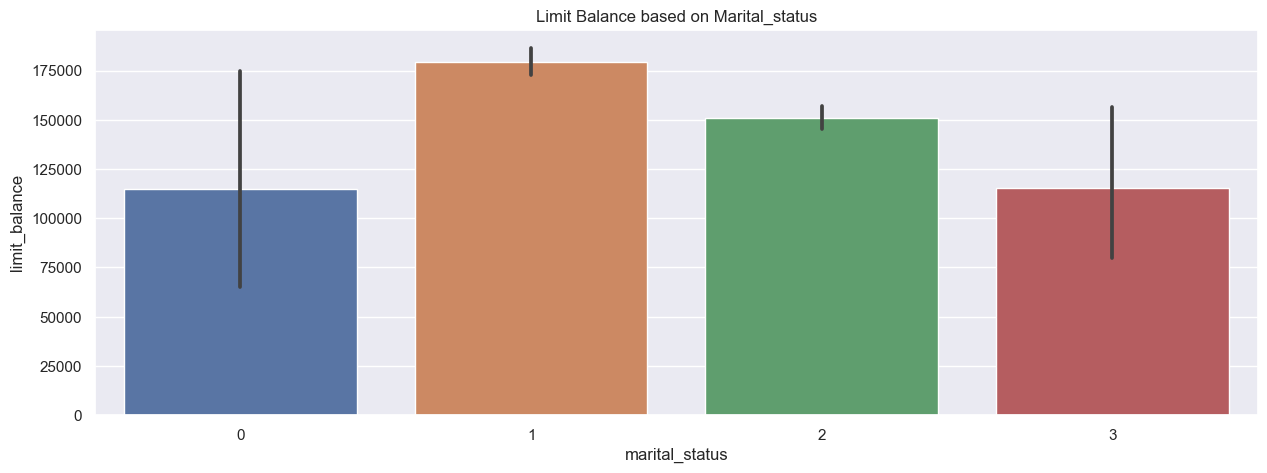

In [37]:
plt.figure(figsize=(15, 5))
sns.set_theme()
sns.barplot(x=df['marital_status'],y=df['limit_balance'])
plt.title('Limit Balance based on Marital_status')

### Correlation on sex and marital_status

Text(0.5, 1.0, 'Pay')

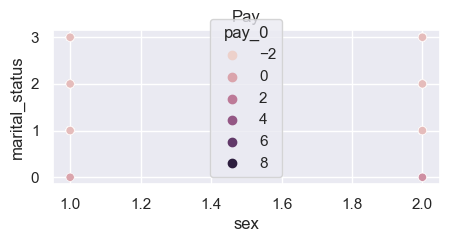

In [38]:
plt.figure(figsize=(5, 2))
sns.set_theme()
sns.scatterplot(x=df['sex'],y=df['marital_status'],hue=df['pay_0'])
plt.title('Pay')

Text(0.5, 1.0, 'Limit Balance')

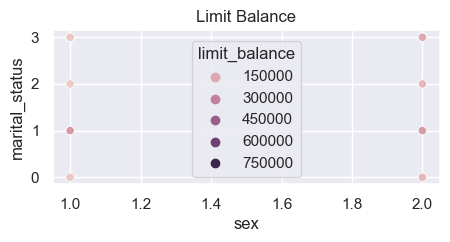

In [39]:
plt.figure(figsize=(5, 2))
sns.set_theme()
sns.scatterplot(x=df['sex'],y=df['marital_status'],hue=df['limit_balance'])
plt.title('Limit Balance')

#### Pay 0-6

plots are trying to check the relationship between the `pay_0` to `pay_6` columns and `limit_balance`, we can see on every plot `-2` to `0` pay type on `pay0-6` having a high `limit balance`, so we conclude if peoples paid early before due date, `limit balance` will be increase.

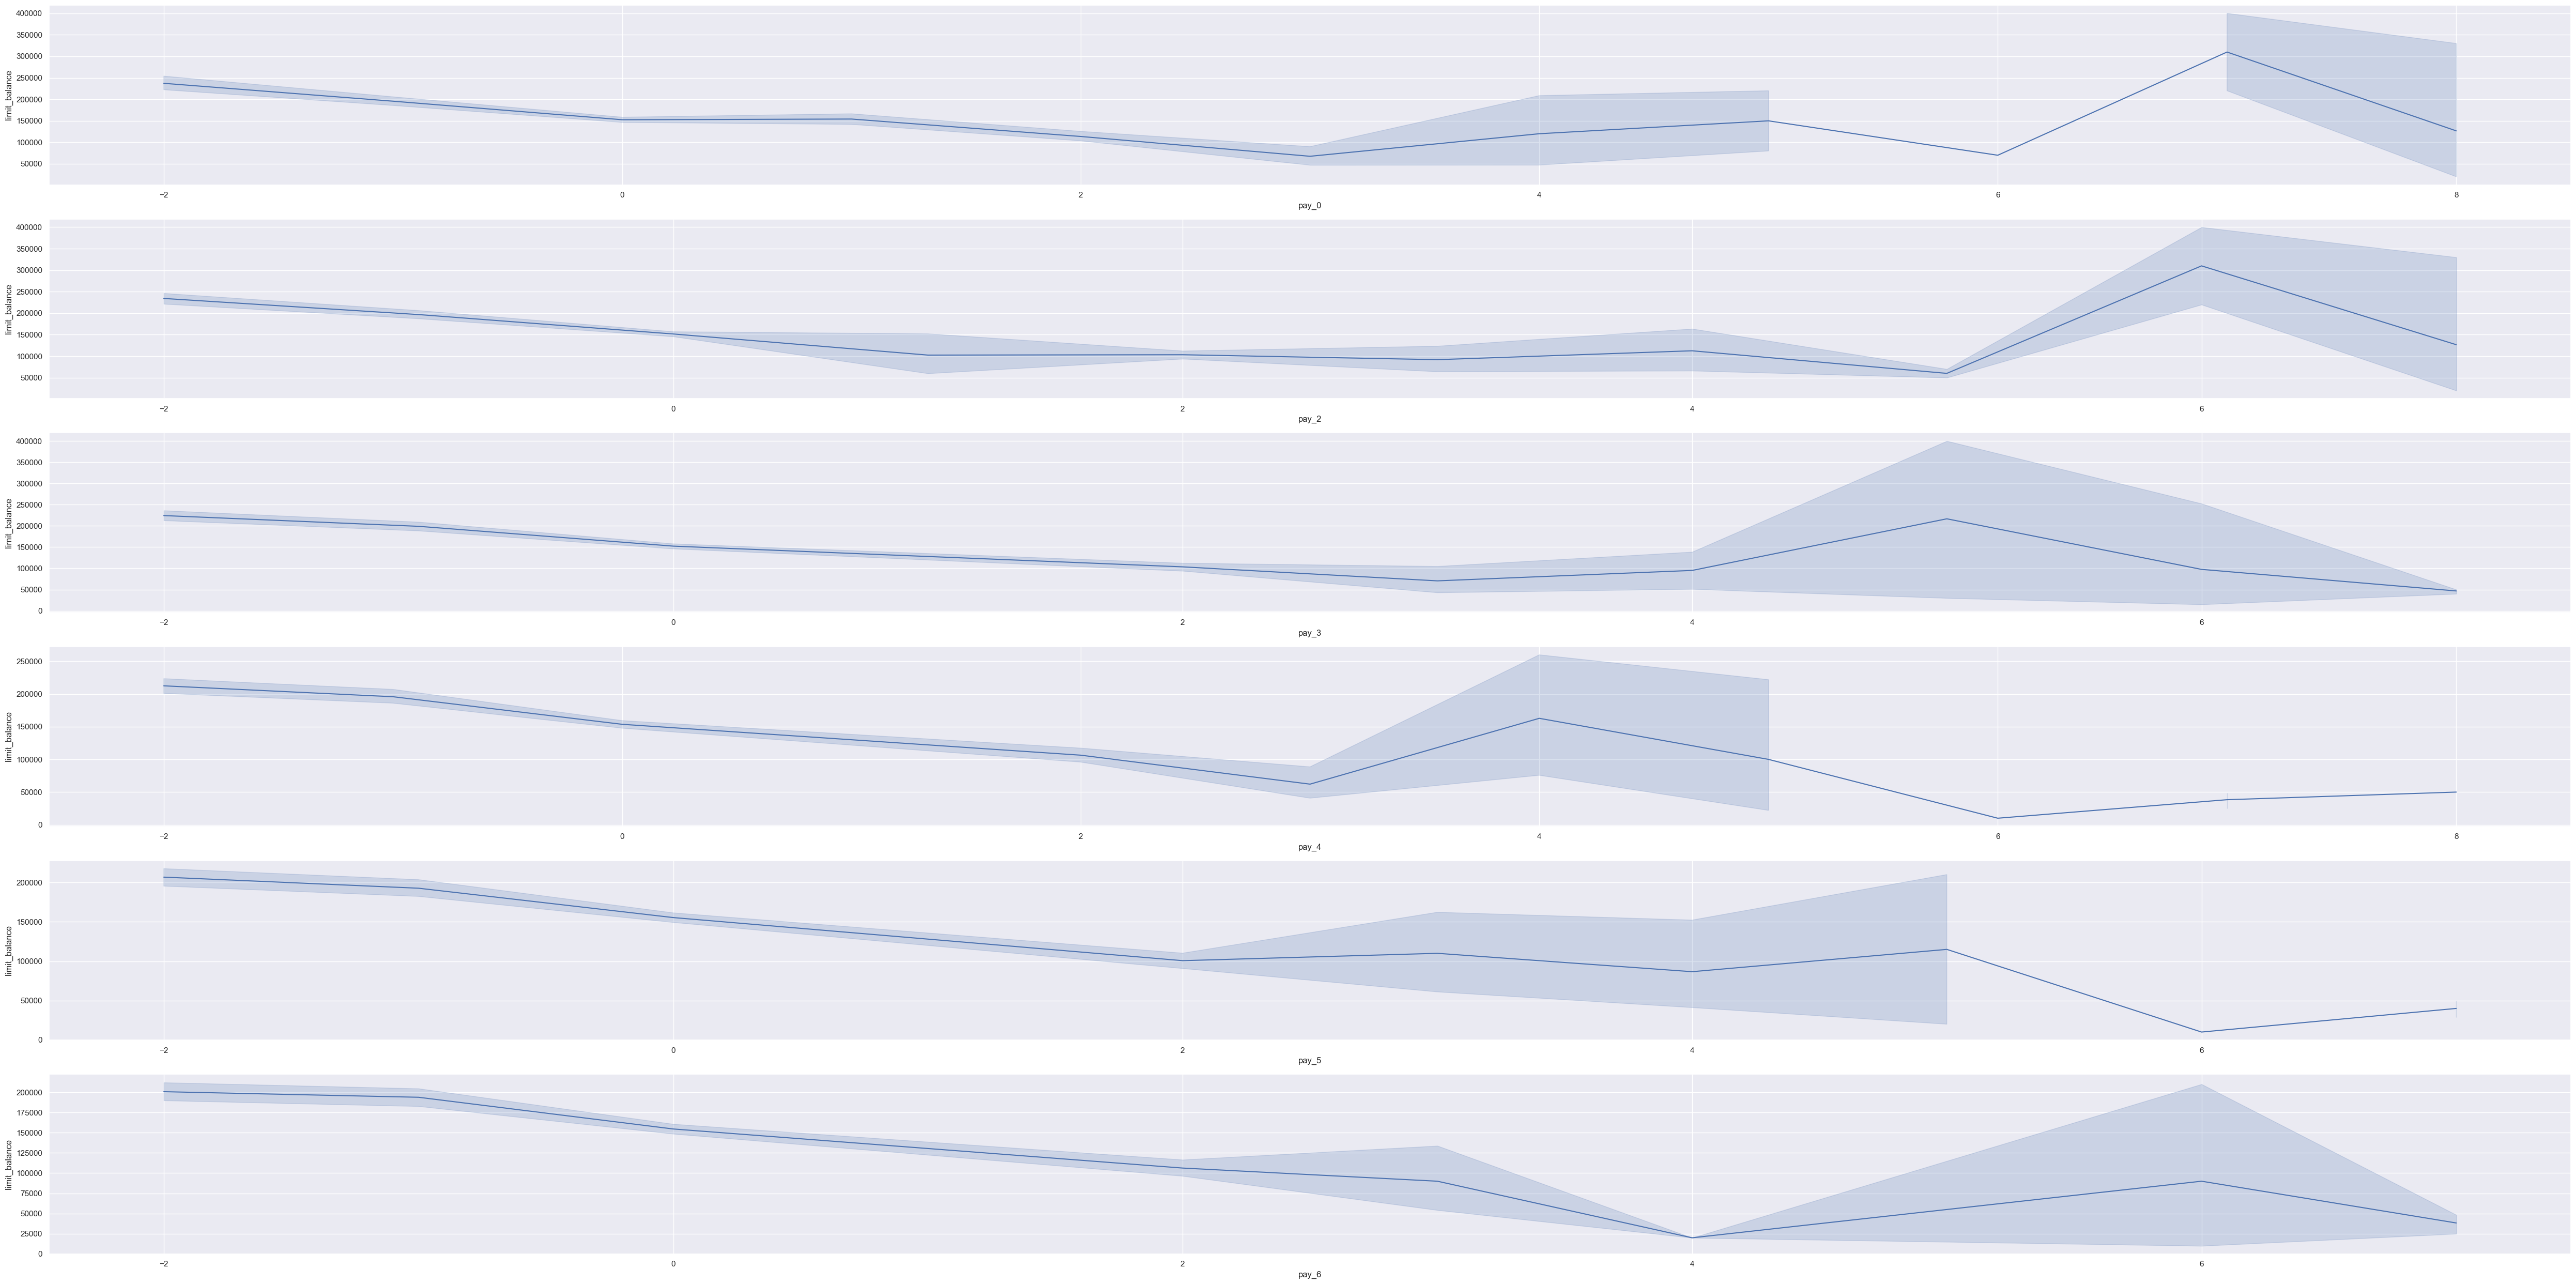

In [40]:
fig, axes = plt.subplots(nrows = 6, figsize = (50, 25),)
sns.set_theme(style='whitegrid',palette='deep',font='sans-serif', font_scale=1,color_codes=True, rc=None)

#Plot for pay_1
sns.lineplot(x=df['pay_0'],y=df['limit_balance'], ax=axes[0])
#Plot for pay_2
sns.lineplot(x=df['pay_2'],y=df['limit_balance'], ax=axes[1])
#Plot for pay_3
sns.lineplot(x=df['pay_3'],y=df['limit_balance'], ax=axes[2])
#Plot for pay_4
sns.lineplot(x=df['pay_4'],y=df['limit_balance'], ax=axes[3])
#Plot for pay_5
sns.lineplot(x=df['pay_5'],y=df['limit_balance'], ax=axes[4])
#Plot for pay_6
sns.lineplot(x=df['pay_6'],y=df['limit_balance'], ax=axes[5])


plt.tight_layout()

# PREPROCESSING

### Feature Selection

Now based on our analys on `EDA` the only numerical is on `limit_balance` because it has the correlation on every `pay_0-6`, limit balance is shows us how much we spend money, and the payment before due date, and for categorical we use `pay_0-6` because this coloumns show the payment menthod due date. and we make new coloumn `class` to make classification by limit balance and put it as categorical features

In [41]:
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,class
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0,2.0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,...,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1,2.0
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0,2.0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0,3.0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,...,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1,1.0
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0,1.0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0,2.0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0,2.0


### Split between `X` (Features) and `y` (Target), and split between Train-Set and Test-Set

And we use `y_train` and `y_test` for `default_payment_next_month` because we want to predict and make the model based on our features.

In [42]:
x = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print('X Train Size : ', x_train.shape)
print('X Test Size  : ', x_test.shape)
print('')
print('Y Train Size : ', y_train.shape)
print('Y Test Size : ', y_test.shape)

X Train Size :  (2074, 24)
X Test Size  :  (890, 24)

Y Train Size :  (2074,)
Y Test Size :  (890,)


### EDA FOR MODELING

Making variable with x_train and y_train for eda modeling

In [43]:
dfeda = pd.concat([x_train, y_train], axis=1)
dfeda.shape

(2074, 25)

In [44]:
dfeda.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,class,default_payment_next_month
1738,90000.0,2,2,2,23.0,2.0,4.0,4.0,3.0,4.0,...,39093.0,38167.0,2000.0,0.0,3400.0,0.0,0.0,1000.0,1.0,0
1103,20000.0,1,3,2,32.0,0.0,0.0,2.0,2.0,2.0,...,12274.0,15049.0,2400.0,0.0,7000.0,0.0,3000.0,4000.0,1.0,1
2124,10000.0,2,2,2,27.0,1.0,2.0,2.0,0.0,0.0,...,8650.0,0.0,1230.0,0.0,500.0,450.0,0.0,0.0,1.0,1
2211,60000.0,2,2,2,26.0,1.0,2.0,0.0,0.0,2.0,...,54065.0,57499.0,2000.0,2500.0,3200.0,1000.0,4500.0,0.0,1.0,0
1813,90000.0,2,3,1,68.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,1052.0,69237.0,0.0,1000.0,1000.0,1052.0,71062.0,3000.0,1.0,0


In [45]:
numcol = ['limit_balance']
catcol = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']

In [46]:
X_train_num = x_train[numcol]
X_train_cat = x_train[catcol]

X_test_num = x_test[numcol]
X_test_cat = x_test[catcol]

## Handling Outliers

In [47]:
Q3 = df['limit_balance'].quantile(.75)
Q1 = df['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = df[(df['limit_balance'] > upper) | (df['limit_balance'] < lower)]
print('Limit Balance Outliers')
print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

Limit Balance Outliers
count of outlier:  14
percentage of outlier:  0.47233468286099867 %


### Making visualization for detect outliers

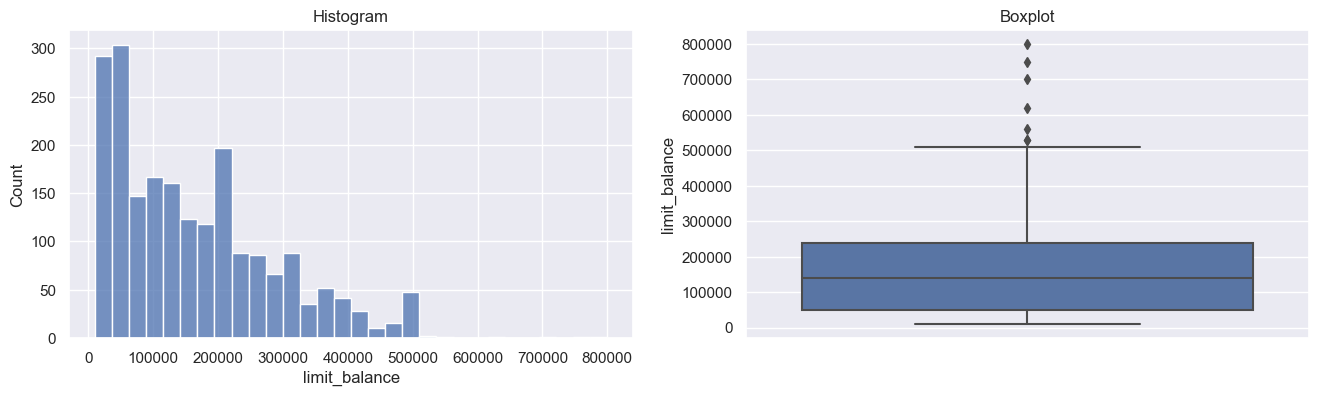

In [48]:
def diagnostic_plots(x_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))
    sns.set_theme()

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train[variable])
    plt.title('Boxplot')

    plt.show()

diagnostic_plots(x_train, 'limit_balance')


### Handled outliers with capping method using Winsorizer

In [49]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                         tail='both', # cap left, right or both tails 
                         fold=1.5,
                         variables=['limit_balance'])

windsoriser.fit(X_train_num)

x_train_capp = windsoriser.transform(X_train_num)

Showing boxplot after using capping with Winsorizer, and now our data is free from outliers

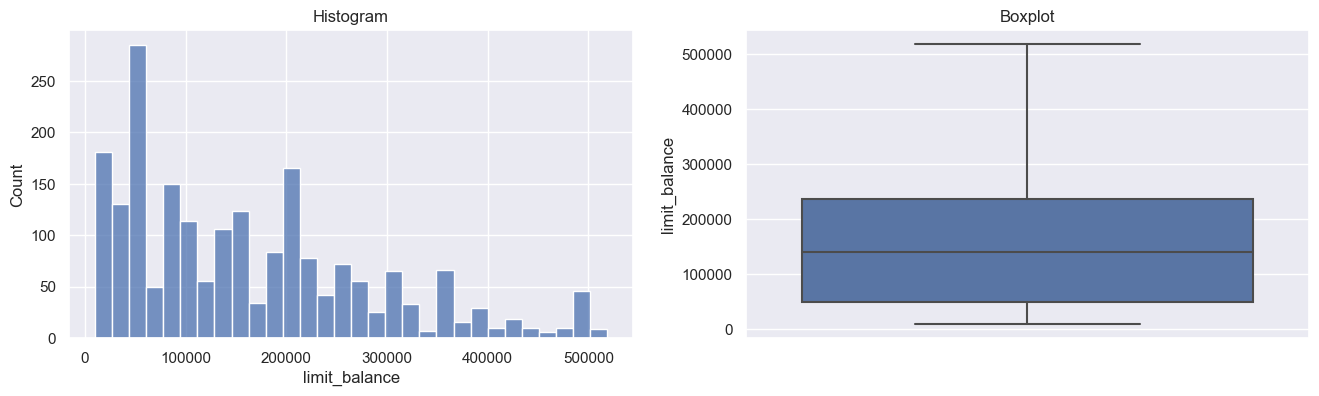

In [50]:
diagnostic_plots(x_train_capp, 'limit_balance')

### Feature Scaling using MinMaxScaler

In [51]:
scaler = MinMaxScaler()
scaler.fit_transform(x_train_capp)

X_train_num_scaled = scaler.transform(x_train_capp)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.15724816],
       [0.01965602],
       [0.        ],
       ...,
       [0.03931204],
       [0.58968059],
       [0.68796069]])

### Concate between Numerical Columns and Categorical Columns

This step is done to combine the numerical and categorical features of the data into one single feature set for training or testing the model, because machine learning models can only accept numerical values as input

In [52]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[ 0.15724816,  2.        ,  4.        , ...,  3.        ,
         4.        ,  3.        ],
       [ 0.01965602,  0.        ,  0.        , ...,  2.        ,
         2.        ,  0.        ],
       [ 0.        ,  1.        ,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.03931204,  2.        ,  0.        , ...,  0.        ,
         0.        ,  2.        ],
       [ 0.58968059, -1.        ,  0.        , ...,  0.        ,
        -1.        , -1.        ],
       [ 0.68796069, -1.        , -1.        , ..., -1.        ,
         0.        , -1.        ]])

The columns parameter is set to [numcol+catcol], which means that the column names of the DataFrame will be the concatenation of numcol and catcol.

In [53]:
X_train_final = pd.DataFrame(X_train_final, columns=[numcol+catcol])
X_train_final

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.157248,2.0,4.0,4.0,3.0,4.0,3.0
1,0.019656,0.0,0.0,2.0,2.0,2.0,0.0
2,0.000000,1.0,2.0,2.0,0.0,0.0,0.0
3,0.098280,1.0,2.0,0.0,0.0,2.0,2.0
4,0.157248,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0
...,...,...,...,...,...,...,...
2069,0.098280,0.0,0.0,0.0,0.0,0.0,0.0
2070,0.019656,0.0,0.0,0.0,0.0,0.0,0.0
2071,0.039312,2.0,0.0,0.0,0.0,0.0,2.0
2072,0.589681,-1.0,0.0,0.0,0.0,-1.0,-1.0


### Encoding

If the categorical features are already encoded as numeric values, then there is no need to perform additional encoding.
It's important to make sure that the categorical variables are already encoded as numeric values before concatenating with numerical features, this is because many machine learning models can only accept numerical values as input. If the categorical features are not encoded, then it's necessary to encode them before passing them to the model.

It's also important to keep in mind that different encoding technique may lead to different results, so it's important to choose the right encoding technique that suit the data and the model.

and our categorical features is already numeric.

In [54]:
df[catcol]

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2960,-1.0,-1.0,2.0,-1.0,-1.0,-2.0
2961,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0
2962,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
2963,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0


# Model Training

defines a number of different machine learning models, specifically `logistic regression, support vector machines (SVM), decision trees, random forests, k-nearest neighbors (KNN), naive Bayes, and AdaBoost`. Each model is initialized with its default parameters, however, logistic regression's max_iter is set to 1000000.

In [55]:

# Defining Logistic Regression Model
log_model = LogisticRegression(max_iter=1000000)
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining naive bayes Model
nb_model = GaussianNB()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier()


# Cross Validation

stratified k-fold cross-validation on a dataset.

In [56]:
skfold=StratifiedKFold(n_splits=5)

The code you provided is checking the `cross validation` score for several different machine learning models `logistic regression, SVM, decision tree, random forest, k-nearest neighbors, naive Bayes, and Adaboost` and it will prints the best model and the `cross valdiation` mean. The best model is the one that has the highest recall score on average across all the folds. 

The `naive Bayes` model is the best model based on the `cross validation scores` it has `0.90` score, it means that the naive Bayes model performed the best in terms of recall (the ratio of true positive predictions to the total number of actual positive cases) across all the subsets of the data.

In [57]:
# checking cross validation score
cv_log_model = cross_val_score(log_model, X_train_final, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm_model, X_train_final, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dt_model, X_train_final, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf_model, X_train_final, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, X_train_final, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb_model, X_train_final, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, X_train_final, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.41111111 0.38888889 0.36666667 0.36263736 0.31111111]
recall - Mean - Cross Validation :  0.3680830280830281
recall - Std - Cross Validation  :  0.033351942816595655
recall - Range of Test-Set       :  0.33473108526643247 - 0.40143497089962377
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.45555556 0.44444444 0.4        0.45054945 0.41111111]
recall - Mean - Cross Validation :  0.43233211233211233
recall - Std - Cross Validation  :  0.022421439279202746
recall - Range of Test-Set       :  0.40991067305290957 - 0.4547535516113151
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.46666667 0.41111111 0.35555556 0.40659341 0.41111111]
recall - Mean - Cross Validation :  0.41020757020757015
recall - Std - Cross Validation  :  0.03518285727299666
recall - Range of Test-Set       :  0.3750247129345735 - 0.4453904274805668
----------------------

# RANDOM FOREST MODEL

fit an object with `naive bayes` to train a model on the input data X_train_final and the corresponding labels y_train

In [58]:
rf_model.fit(X_train_final, y_train)

RandomForestClassifier()

The `recall` for class 0 is `0.98`, which means that out of all the actual positive instances (i.e., instances where the true label is "0"), the classifier correctly identified 86% of them as "0".

The `f1-score` for class 0 is `0.96`, which is a combined measure of precision and recall for class 0. It gives more weight to recall than precision, with a higher value indicating better performance. In this case, the classifier has a good balance of precision and recall for class 0.

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1623
           1       0.90      0.75      0.82       451

    accuracy                           0.93      2074
   macro avg       0.92      0.86      0.89      2074
weighted avg       0.93      0.93      0.93      2074

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       706
           1       0.48      0.34      0.40       184

    accuracy                           0.79       890
   macro avg       0.66      0.62      0.64       890
weighted avg       0.77      0.79      0.77       890

Confusion Matrix      : 


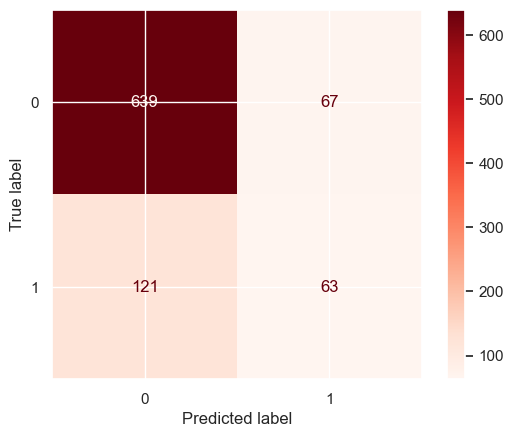

In [59]:
y_pred_train = rf_model.predict(X_train_final)
y_pred_test = rf_model.predict(X_test_final)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_test_final, y_test, cmap='Reds'))

# Hyperparameter Tuning

This code creates a dictionary called `all_reports` that contains a string `Baseline (Default Hyperparameter)` and the value is another dictionary called `score_reports`. `score_reports` contains key-value pairs where the key is a string describing the metric and train/test set.

In [60]:
all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.788764
test - f1_score,0.401274
test - precision,0.484615
test - recall,0.342391
train - accuracy,0.928640
train - f1_score,0.820823
train - precision,0.904000
train - recall,0.751663


## RANDOM FOREST

`Hyperparameter Tuning` :
Manual search for hyperparameter tuning involves manually specifying a range of values for each hyperparameter and running the model with different combinations of these values to find the best set of hyperparameters and set to a small positive value 1e-9 to avoid division by zero errors. 

In [61]:
rf_ms_1 = RandomForestClassifier(n_estimators=150,
                                 criterion='entropy',
                                 max_depth=100)
rf_ms_1.fit(X_train_final, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=150)

Check Performance Model against Train-Set

In [62]:
y_pred_test = rf_ms_1.predict(X_test_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')


F1 Score - Train Set  :  0.8208232445520581 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1623
           1       0.90      0.75      0.82       451

    accuracy                           0.93      2074
   macro avg       0.92      0.86      0.89      2074
weighted avg       0.93      0.93      0.93      2074
 

F1 Score - Test Set   :  0.4076433121019108 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       706
           1       0.49      0.35      0.41       184

    accuracy                           0.79       890
   macro avg       0.67      0.63      0.64       890
weighted avg       0.77      0.79      0.78       890
 



F1 Score - Train Set  :  0.8205128205128205 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1623
           1       0.91      0.75      0.82       451

    accuracy                           0.93      2074
   macro avg       0.92      0.86      0.89      2074
weighted avg       0.93      0.93      0.93      2074
 

Confusion Matrix      : 


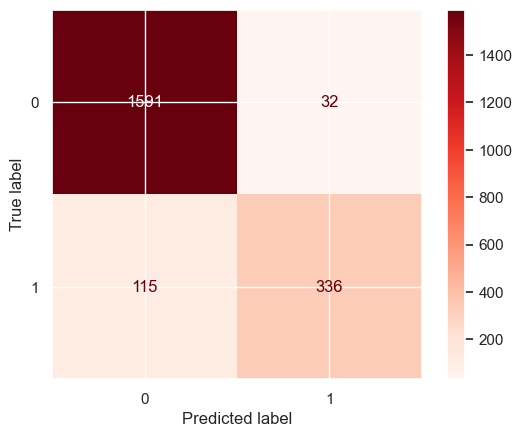

In [63]:
y_pred_train = rf_ms_1.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_train_final, y_train, cmap='Reds'))

Cross Validation using `cross_val_score`, and to check the stability of the model by looking at the standard deviation and range of test-set. F1 scores for each fold of the cross validation are 0.768, 0.7304, 0.7219. mean of these scores is 0.7401 which means that on average the model is able to correctly predict about 74% 

In [64]:
f1_score_train_cross_val = cross_val_score(rf_ms_1, 
                                           X_train_final, 
                                           y_pred_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.75720165 0.74137931 0.72033898]
F1 Score - Mean - Cross Validation :  0.7396399798287366
F1 Score - Std - Cross Validation  :  0.015099292137437936
F1 Score - Range of Test-Set       :  0.7245406876912988 - 0.7547392719661745


Check Performance Model against Test-Set

F1 Score - Test Set   :  0.4076433121019108 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       706
           1       0.49      0.35      0.41       184

    accuracy                           0.79       890
   macro avg       0.67      0.63      0.64       890
weighted avg       0.77      0.79      0.78       890
 

Confusion Matrix      : 


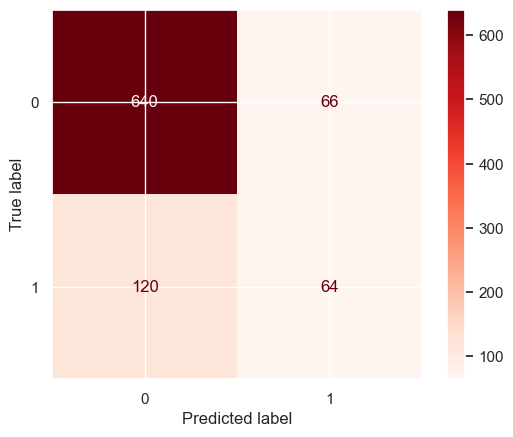

In [65]:
y_pred_test = rf_ms_1.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_test_final, y_test, cmap='Reds'))

Save Classification Report into a Dictionary, `score_report` which contains a set of evaluation metrics for the model's performance on both the training and test sets. The metrics include precision, recall, accuracy, and f1-score

In [66]:
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports['Manual Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Manual Search
train - precision,0.904000,0.913043
train - recall,0.751663,0.745011
train - accuracy,0.928640,0.929122
train - f1_score,0.820823,0.820513
test - precision,0.484615,0.492308
test - recall,0.342391,0.347826
test - accuracy_score,0.788764,0.791011
test - f1_score,0.401274,0.407643


## Random Search

method is used to fit the `random_search` object to the training data `X_train_final` and `y_train`. This will perform the randomized search for the best hyperparameters for the Gaussian Naive Bayes classifier. The `RandomizedSearchCV` object will try a number of different combinations of the hyperparameters specified in `param_distributions`

Create an instance of Random Forest Classifier.

In [67]:
rfc = RandomForestClassifier()

Define the parameter grid for the Random Forest, The `param_grid` dictionary in this code defines the hyperparameters and the possible values for each hyperparameter that will be used in the randomized search

`n_estimators`: The number of trees in the forest, the values are `50, 100, 200, 500`.

`max_depth`: The maximum depth of each tree. The possible values are `None, 5, 10, 20`, if set to `None`, the tree can grow indefinitely.

`min_samples_split`: The minimum number of samples required to split an internal node. The possible values are `2, 5, 10`.

`min_samples_leaf`: The minimum number of samples required to be at a leaf node. The possible values are `1, 2, 4`.

`max_features`: The number of features to consider when looking for the best split. The possible values are `auto', 'sqrt', 'log2'`. If set to `auto`, the algorithm will select max_features=sqrt(n_features)

In [68]:
param_grid = {'n_estimators': [50, 100, 200, 500],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

reate an instance of `RandomizedSearchCV`, this creates an object `rfc_random_search` that can be used to perform the randomized search and to access the best set of `hyperparameters` found during the search. The fit function can be used to fit the random search model to the data.

In [69]:
rfc_random_search = RandomizedSearchCV(estimator=rfc, 
                                       param_distributions=param_grid, 
                                       n_iter=50, 
                                       cv=5, 
                                       n_jobs=-1)

Fit the random search model to the data, fitting a random search object `rfc_random_search` on a training dataset `X_train_final` and training labels `y_train`. 

In [70]:
rfc_random_search.fit(X_train_final, y_train)

/Users/iqbaljanitra/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/iqbaljanitra/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/iqbaljanitra/miniforge3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]})

### Print the best parameters

`n_estimators` specifies the number of trees in the forest.

`min_samples_split` is the minimum number of samples required to split an internal node.

`min_samples_leaf` is the minimum number of samples required to be at a leaf node.

`max_features` is the number of features to consider when looking for the best split.

`max_depth` is the maximum depth of the tree.

In [71]:
print(rfc_random_search.best_params_)

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}


Check Performance Model against test-Set is the predict function is used to make predictions on the test set, which is stored in the variable `X_test_final`. Then, the classification report is a detailed report of the performance of the classifier on the test set. It includes `precision, recall, f1-score, and support` for each class.

F1 Score - Test Set   :  0.46621621621621623 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       706
           1       0.62      0.38      0.47       184

    accuracy                           0.82       890
   macro avg       0.73      0.66      0.68       890
weighted avg       0.80      0.82      0.81       890
 

F1 Score - Train Set  :  0.8205128205128205 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1623
           1       0.91      0.75      0.82       451

    accuracy                           0.93      2074
   macro avg       0.92      0.86      0.89      2074
weighted avg       0.93      0.93      0.93      2074
 

Confusion Matrix      : 


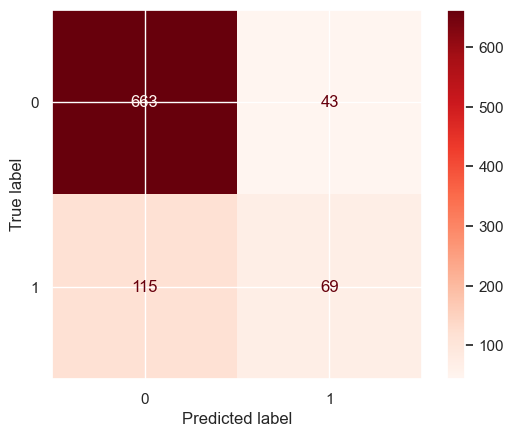

In [72]:
y_pred_test = rfc_random_search.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')

print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc_random_search, X_test_final, y_test, cmap='Reds'))


In [73]:
y_pred_train = rfc_random_search.predict(X_train_final)
y_pred_test = rfc_random_search.predict(X_test_final)

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    ''
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test)
}
all_reports['After Tuning'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Manual Search,After Tuning
train - precision,0.904000,0.913043,0.799320
train - recall,0.751663,0.745011,0.521064
train - accuracy,0.928640,0.929122,0.867406
train - f1_score,0.820823,0.820513,0.630872
test - precision,0.484615,0.492308,0.616071
test - recall,0.342391,0.347826,0.375000
test - accuracy_score,0.788764,0.791011,0.822472
test - f1_score,0.401274,0.407643,0.466216


# SAVING MODEL

In [74]:
with open('model_rf_model.pkl', 'wb') as file_1:
  joblib.dump(rf_model, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('list_num_cols.txt', 'wb') as file_4:
  joblib.dump(numcol, file_4)

with open('list_cat_cols.txt', 'wb') as file_5:
  joblib.dump(catcol, file_5)

# Conclusion

Before building a model, it is important to perform `exploratory data analysis EDA` on the data to understand the distribution and relationship or correlation between of the features we choose with the target variable. This may include visualizing the distribution of `limit_balance` and comparing it to the default rate, and we make classification based on every `limit balance` and we make it as a features, as well as examining the relationship between the past 6 month's payment history and default rate.

next, it may be useful to check for missing values, outliers, and any other potential issues with the data before proceeding with model building.

Once the `EDA` is done, we can use different machine learning algorithms such as `logistic regression, decision tree, random forest, etc` to predict the `default_payment_next_month` based on the `limit_balance` and `pay_0-6` columns. We can use the evaluation metrics such as `accuracy, precision, recall, and f1-score` to evaluate the performance of the model and select the best one.

And we got `randon forest` to fit, Based on the information provided, it seems that a `random forest algorithm` has been chosen to fit the model. `Random Forest` is an ensemble method that creates multiple decision trees and combines their predictions to improve the overall accuracy and reduce overfitting.

In conclusion, the goal of this analysis is to predict whether a customer will default on their next month's payment using their limit balance and past 6 month's payment history and the process of doing this is by performing EDA and using machine learning algorithm to build a model and evaluate the performance.





## CONCEPTUAL PROBLEM

`Jawab pertanyaan berikut:`

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih K yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan Cross Validation !
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk          menggunakannya ?

# Answer

1. `Criterion` in the `Decision Tree` is a sub-method for finding the quality value of a split when forming a Decision Tree. and for the case that we use for our data is `Random Forest` a machine learning method that combines (Decision Tree) into one. The way `Random Forest` works is that it can create a number of `dection trees` at random and combine them into one. The decision trees that are formed will be different and will not be interconnected. After several `decision trees` have been formed, the final result of `Random Forest` is the result of all `decision trees` that were formed. `Random Forest` is used for classification and regression. Random `Forest` was used because it can handle the `overfitting` problem that often occurs in `decision trees`

2. `pruning` in `decision trees` refers to the process of removing `branches or sub-trees` that dont contribute much to the overall accuracy of the model. This helps to simplify the tree and prevent `overfitting`. and if getting rid of the unnecessary parts of the tree for make it efficient it will do removing branches that dont have much impact on the final predictions, we can make the tree more interpretable and improve its generalization performance. and when `pruning` is done, it will start to setting a threshold on the minimum number of samples required to split a node, or removing branches that have a low decrease in impurity. The goal is to find `the right balance between complexity and accuracy`.

3. One common approach is to use a `Cross Validation` to evaluate the model's performance for different values of `K`. we can choose the value of `K` that results in the highest performance on the validation set. which looks at the plot of the model's performance on the validation set as a function of `K`. The optimal value of `K` is chosen as the value of `K` where the rate of improvement in performance starting to decrease.

4. To evaluate the performance of any model we can One technique you could use is `Cross Validation`. It involves dividing your data into two or more subsets by training set and a validation set. this one can train any model on the training set, and then use the validation set to evaluate its performance. This gives you an estimate of how well your model will perform on unseen data. And to decide any data into subsets, there are different techniques for that, such as `K-fold` `Cross validation`, where the data is divided into k subsets, and the model is trained and evaluated `K` times, each time using a different subset as the validation set.

5. the different metrics wwe can use to evaluate my model's performance. One common metric is accuracy, which measures the proportion of correct predictions out of all predictions, `Precision` measures the proportion of true positive predictions out of all positive predictions. It tells the data how many of the positive predictions made by your model are actually correct. `Recall` measures the proportion of true positive predictions out of all actual positive instances. It tells the data how many of the actual positive instances model was able to correctly identify. `F1 Score` is the a mean of precision and recall. It used when you want to balance precision and recall, as it gives a higher score to models that have a good balance between the two.

    `when would I use each of these metrics?` It depends on your specific use case. In a binary classification problem, if you want to minimize the false negatives, use `recall`. If you want to minimize the false positives, use `precision`. If you want to balance between minimize false positive and false negative, use `F1 Score`. And if you want to have a general view of model's performance, you can use `accuracy`.
